In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/page-blocks.csv")
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,label
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [3]:
for col in df.columns:
    print(np.unique(df[col],return_counts=True))

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  41,
        42,  43,  44,  45,  47,  48,  49,  52,  53,  54,  55,  58,  59,
        60,  63,  64,  65,  66,  67,  68,  69,  71,  72,  74,  76,  77,
        79,  81,  82,  83,  84,  85,  86,  87,  91,  93,  94,  95,  98,
       100, 101, 105, 117, 118, 128, 132, 136, 153, 158, 160, 163, 166,
       168, 174, 178, 186, 187, 197, 212, 261, 304, 306, 311, 430, 804],
      dtype=int64), array([254,  87,  58,  64, 271, 351, 831, 940, 903, 630, 326, 164, 103,
        89,  20,  46,  35,  10,  11,   8,   5,  15,  16,  39,  33,   6,
         7,  15,   5,   2,   7,   3,   3,   4,   6,   5,  10,   3,   1,
         2,   1,   1,   1,   2,   1,   1,   2,   3,   5,   1,   1,   1,
         1,   2,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   3,
         1,   1,   1,   6,   1,   1,   1, 

In [4]:
## mapping Label 1 to 0(inliers) Label(2,3,4,5) to 1 outlier
df.label[df.label == 1] = 0
df.label[df.label == 2] = 1
df.label[df.label == 3] = 1
df.label[df.label == 4] = 1
df.label[df.label == 5] = 1


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [5]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,label
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,0
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,0
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,0
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,0
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,0


In [6]:
np.unique(df.label, return_counts=True)

(array([0, 1], dtype=int64), array([4913,  560], dtype=int64))

In [7]:
df_norm = df[df.label == 0]
df_anom = df[df.label == 1]
ds_norm = df_norm.values
ds_anom = df_anom.values
print(ds_norm.shape)
print(ds_anom.shape)

(4913, 11)
(560, 11)


## Train Test split

In [8]:
X_train = ds_norm[:4700, :-1]
Y_train = ds_norm[:4700, -1]
print(X_train.shape, Y_train.shape)

(4700, 10) (4700,)


In [9]:
l = ds_norm.shape[0] - X_train.shape[0] 
no_of_test_samples = l + ds_anom.shape[0]
no_of_features = X_train.shape[1]

X_test = np.zeros((no_of_test_samples, no_of_features))
Y_test = np.zeros((no_of_test_samples,))

X_test[:l, :] = ds_norm[4700:, :-1]
X_test[l:, :] = ds_anom[:,:-1]
print(X_test.shape)
Y_test[:l,] = ds_norm[4700:, -1]
Y_test[l:,] = ds_anom[:, -1]
print(Y_test.shape)

(773, 10)
(773,)


In [10]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4700, 10) (4700,)
(773, 10) (773,)


## Model

In [11]:
# CHECK : Constants
omega = 1.

class ELM(object):
    def __init__(self, sess, batch_size, input_len, hidden_num, output_len, W, b):
        '''
        Args:
          sess : TensorFlow session.
          batch_size : The batch size (N)
          input_len : The length of input. (L)
          hidden_num : The number of hidden node. (K)
          output_len : The length of output. (O)
          W : randomly initialized weights
          b : randomly initialized bias
        '''
    
        self._sess = sess 
        self._batch_size = batch_size
        self._input_len = input_len
        self._hidden_num = hidden_num
        self._output_len = output_len 

        # for train
        self._x0 = tf.placeholder(tf.float32, [self._batch_size, self._input_len])
        self._t0 = tf.placeholder(tf.float32, [self._batch_size, self._output_len])

        # for test
        self._x1 = tf.placeholder(tf.float32, [None, self._input_len])
        self._t1 = tf.placeholder(tf.float32, [None, self._output_len])

#         self._W = tf.Variable(
#           tf.random_normal([self._input_len, self._hidden_num]),
#           trainable=False, dtype=tf.float32)
#         self._b = tf.Variable(
#           tf.random_normal([self._hidden_num]),
#           trainable=False, dtype=tf.float32)

        ## Wts initialisation
        self._W = W
        self._b = b
        
        self._beta = tf.Variable(
          tf.zeros([self._hidden_num, self._output_len]),
          trainable=False, dtype=tf.float32)
        self._var_list = [self._W, self._b, self._beta]

        self.H0 = tf.matmul(self._x0, self._W) + self._b # N x L
        self.H0_T = tf.transpose(self.H0)

        self.H1 = tf.matmul(self._x1, self._W) + self._b # N x L
        self.H1_T = tf.transpose(self.H1)

        # beta analytic solution : self._beta_s (K x O)
        if self._input_len < self._hidden_num: # L < K
            identity = tf.constant(np.identity(self._hidden_num), dtype=tf.float32)
            self._beta_s = tf.matmul(tf.matmul(tf.matrix_inverse(
                tf.matmul(self.H0_T, self.H0) + identity/omega), 
                self.H0_T), self._t0)
          # _beta_s = (H_T*H + I/om)^(-1)*H_T*T
        else:
            identity = tf.constant(np.identity(self._batch_size), dtype=tf.float32)
            self._beta_s = tf.matmul(tf.matmul(self.H0_T, tf.matrix_inverse(
                tf.matmul(self.H0, self.H0_T)+identity/omega)), self._t0)
          # _beta_s = H_T*(H*H_T + I/om)^(-1)*T

        self._assign_beta = self._beta.assign(self._beta_s)
        self._fx0 = tf.matmul(self.H0, self._beta)
        self._fx1 = tf.matmul(self.H1, self._beta)

        self._cost = tf.reduce_mean(tf.cast(tf.losses.mean_squared_error(labels=self._t0, predictions=self._fx0), tf.float32))
                                        
        self._init = False
        self._feed = False

        # Cost for every sample point
#         self._correct_prediction = tf.equal(tf.argmax(self._fx1,1), tf.argmax(self._t1,1))
#         self._accuracy = tf.reduce_mean(tf.cast(self._correct_prediction, tf.float32))
        self._testcost = tf.cast(tf.losses.mean_squared_error(labels=self._t1, predictions=self._fx1), tf.float32)


    def feed(self, x, t):
        '''
        Args :
          x : input array (N x L)
          t : label array (N x O)
        '''

        if not self._init : self.init()
        self._sess.run(self._assign_beta, {self._x0:x, self._t0:t})
#         print(self._sess.run(self._cost, {self._x0:x, self._t0:t}))
        
        self._feed = True

    def init(self):
        self._sess.run(tf.initialize_variables(self._var_list))
        self._init = True

    def test(self, x, t=None):
        if not self._feed : exit("Not feed-forward trained")
        if t is not None :
#             print("Accuracy: {:.9f}".format(self._sess.run(self._accuracy, {self._x1:x, self._t1:t})))
            return self._sess.run(self._testcost, {self._x1:x, self._t1:t})
            
        else :
            return self._sess.run(self._fx1, {self._x1:x})


## Init parameters

In [12]:
import tensorflow as tf

In [13]:
sess = tf.Session()
batch_size = X_train.shape[0]
hidden_num = 150
input_len = X_train.shape[1]
print("batch_size : {}".format(batch_size))
print("hidden_num : {}".format(hidden_num))
print(input_len)
W = tf.Variable(
  tf.random_normal([input_len, hidden_num]),
  trainable=False, dtype=tf.float32)
b = tf.Variable(
  tf.random_normal([hidden_num]),
  trainable=False, dtype=tf.float32)

batch_size : 4700
hidden_num : 150
10


## Init list of W and b

In [14]:
init_list = []
for i in range(10):
        init_list.append((tf.Variable(tf.random_normal([input_len, hidden_num],seed=i),trainable=False, dtype=tf.float32),tf.Variable(tf.random_normal([hidden_num], seed=i),trainable=False, dtype=tf.float32)))
print(len(init_list))

10


## Accuracy

In [15]:
def accuracy(anom_pred):
    cnt = 0
    for pt in anom_pred:
        if pt[1]>=ds_norm.shape[0]-X_train.shape[0] and pt[1]<X_test.shape[0]:
            cnt+=1
    return (cnt/float(ds_anom.shape[0]))*100

## Evaluation

In [16]:

results = {}
itr = 0
best_W = tf.Variable(tf.zeros([input_len,hidden_num]))
best_b = tf.Variable(tf.zeros([hidden_num]))
best_acc = 0.0
best_acc_idx = 0

for W,b in init_list:
    print(itr)
    ## feed W,b from list and evaluate error and accuracy corresponding to them
    elm = ELM(sess, batch_size, input_len, hidden_num, input_len, W, b)
    train_x, train_y = (X_train[:batch_size], X_train[:batch_size])

    elm.feed(train_x, train_y)
    
    ## error list
    err = []
    for idx,test_pt in enumerate(X_test):
        x = test_pt.reshape(1,-1)
        err.append((elm.test(x, x), idx))
    
    err.sort(reverse=True)
    
    anom_pred = err[:ds_anom.shape[0]]
    
    acc = accuracy(anom_pred) 
    
    results[itr] = [(err,acc)]
    itr += 1
    if acc>best_acc:
        best_W = W
        best_b = b
        best_acc = acc
        best_acc_idx = itr-1
    


0
Instructions for updating:
Use `tf.variables_initializer` instead.
1
2
3
4
5
6
7
8
9


In [17]:
for k in results.keys():
    print(results[k][0][1])

65.17857142857143
62.142857142857146
68.21428571428572
64.28571428571429
64.64285714285715
64.64285714285715
66.96428571428571
64.46428571428572
67.14285714285714
65.71428571428571


In [18]:
err = results[best_acc_idx][0][0]
err

[(295457260000.0, 270),
 (282408220000.0, 268),
 (268851690000.0, 288),
 (145523970000.0, 295),
 (53234217000.0, 372),
 (24691188000.0, 649),
 (20501270000.0, 659),
 (18825013000.0, 646),
 (17536270000.0, 677),
 (15169264000.0, 608),
 (8864511000.0, 671),
 (6837156400.0, 678),
 (6809726000.0, 730),
 (5365658600.0, 267),
 (4759533000.0, 314),
 (4517569500.0, 559),
 (4340976600.0, 636),
 (3291523800.0, 653),
 (3208444700.0, 658),
 (3018996700.0, 642),
 (2854772700.0, 597),
 (2326020400.0, 725),
 (2071779600.0, 602),
 (1513710000.0, 603),
 (1506124900.0, 374),
 (1293374700.0, 621),
 (1224221400.0, 294),
 (1190589400.0, 501),
 (1047243800.0, 660),
 (1004940900.0, 414),
 (982664000.0, 341),
 (904037060.0, 483),
 (860757300.0, 50),
 (819965000.0, 596),
 (786712450.0, 335),
 (777147500.0, 640),
 (405957470.0, 560),
 (401057340.0, 352),
 (356313660.0, 669),
 (303886100.0, 385),
 (301816160.0, 400),
 (293985630.0, 0),
 (283936260.0, 20),
 (263848830.0, 482),
 (239524770.0, 25),
 (235455180.0, 2

In [19]:
err_array = np.array(err)

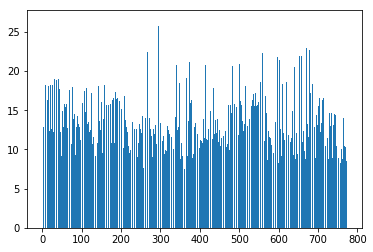

In [23]:
plt.bar(err_array[:,1], np.log(err_array[:,0]))
plt.show()

In [21]:
W_final = best_W.eval(session=sess)
b_final = best_b.eval(session=sess)
print(W_final.shape)
print(b_final.shape)
print(best_acc)

(10, 150)
(150,)
68.21428571428572


In [24]:
## One class SVM

In [25]:
from sklearn.svm import OneClassSVM

In [26]:
ocSVM = OneClassSVM()

In [27]:
ocSVM.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [28]:
pred = ocSVM.predict(X_test)

In [29]:
pred[pred==1] = 0
pred[pred==-1] = 1

In [31]:
acc = np.sum(pred == Y_test)/X_test.shape[0]

In [32]:
acc

0.6972833117723156

In [33]:
## Data preparation for clustering algorithms

In [34]:
samples = X_train.shape[0]+X_test.shape[0]
X = np.zeros((samples,X_train.shape[1]))
X[:X_train.shape[0], :] = X_train[:, :]
X[X_train.shape[0]:, :] = X_test[:, :]
X.shape

(5473, 10)

In [35]:
Y = np.zeros(samples,)
Y[:Y_train.shape[0]] = Y_train
Y[Y_train.shape[0]:] = Y_test
Y.shape

(5473,)

In [36]:
## DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [53]:
dbscan = DBSCAN(eps=50.0)

In [54]:
pred = dbscan.fit_predict(X)

In [55]:
acc = np.sum(pred==Y)/Y.shape[0]
acc

0.6539375114196967

In [56]:
## LOF

In [57]:
from sklearn.neighbors import LocalOutlierFactor

In [58]:
lof = LocalOutlierFactor()

In [59]:
pred = lof.fit_predict(X)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [60]:
np.unique(pred, return_counts=True)

(array([-1,  1]), array([ 548, 4925], dtype=int64))

In [61]:
pred[pred==1] = 0
pred[pred == -1] = 1
pred

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
acc = np.sum(pred==Y)/Y.shape[0]
acc

0.8750228393933858

## Accuracy in percentage
    ELM: 68.21
    One Class SVM: 69.72
    DBSCAN: 65.39
    LOF: 87.50